<h1> Data Pre-processing</h1>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import shutil
from glob import glob
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#file path for training and testing data
train_data_path = r'C:\Users\andir\OneDrive\Documents\Fruit-Classification-Project\fruits-360_100x100\fruits-360\Training'
test_data_path = r'C:\Users\andir\OneDrive\Documents\Fruit-Classification-Project\fruits-360_100x100\fruits-360\Test'

#copy file path for training and testing data
train_copy_path = r'C:\Users\andir\OneDrive\Documents\Fruit-Classification-Project\fruits-360_100x100\fruits-360\Training_copy'
test_copy_path = r'C:\Users\andir\OneDrive\Documents\Fruit-Classification-Project\fruits-360_100x100\fruits-360\Test_copy'

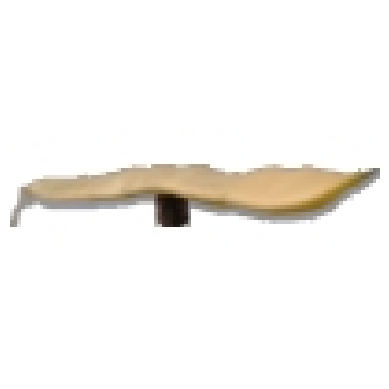

In [3]:
#showing an example of the data
img = tf.keras.preprocessing.image.load_img(train_data_path + r"\Beans 1\r1_0_100.jpg", target_size=(100, 100))

plt.imshow(img)
plt.axis('off')
plt.show()

In [4]:
#define image size
img_rows, img_cols = 100, 100

#define batch size
batch_size = 64

#define number of epochs
epochs = 30

In [5]:
#list of classes
train_classes = os.listdir(train_data_path)
test_classes = os.listdir(test_data_path)
print(train_classes)
print(test_classes)

#identify missing classes
print(set(train_classes)-set(test_classes))

['Apple 10', 'Apple 12', 'Apple 13', 'Apple 14', 'Apple 17', 'Apple 6', 'Apple 9', 'Apple Braeburn 1', 'Apple Core 1', 'Apple Crimson Snow 1', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith 1', 'Apple hit 1', 'Apple Pink Lady 1', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious 1', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apple Rotten 1', 'Apple worm 1', 'Apricot 1', 'Avocado 1', 'Avocado ripe 1', 'Banana 1', 'Banana 3', 'Banana Lady Finger 1', 'Banana Red 1', 'Beans 1', 'Beetroot 1', 'Blackberrie 1', 'Blackberrie 2', 'Blackberrie half rippen 1', 'Blackberrie not rippen 1', 'Blueberry 1', 'Cabbage red 1', 'Cabbage white 1', 'Cactus fruit 1', 'Cactus fruit green 1', 'Cactus fruit red 1', 'Caju seed 1', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula 1', 'Carrot 1', 'Cauliflower 1', 'Cherry 1', 'Cherry 2', 'Cherry Rainier 1', 'Cherry Wax Black 1', 'Cherry Wax not rippen 1', 'Cherry Wax Red 1', 'Cherry Wax Yellow 1', 'Chestnut 1', 'Clementine 1',

In [6]:
#copy training and testing data
if not os.path.exists(train_copy_path):
    shutil.copytree(train_data_path,train_copy_path)
    print("Copied training data to new directory.")

if not os.path.exists(test_copy_path):
    shutil.copytree(test_data_path,test_copy_path)
    print("Copied testing data to new directory.")

#remove missing classes from copied training set
train_class_path = os.path.join(train_copy_path, "Caju seed 1")

if os.path.exists(train_class_path):
    shutil.rmtree(train_class_path)
    print("Removed 'Caju seed 1' class from the copied training set.")
else:
    print("'Caju seed 1' class is not found in the copied training set.")

'Caju seed 1' class is not found in the copied training set.


In [7]:
#updated list and number of training and testing classes
className = glob(train_copy_path + '/*')
numberOfClass = len(className)
print("Number of Train Fruit Class: {}".format(numberOfClass))

className2 = glob(test_copy_path + '/*')
numberOfClass2 = len(className2)
print("Number of Test Fruit Class: {}".format(numberOfClass2))

Number of Train Fruit Class: 164
Number of Test Fruit Class: 164


In [8]:
#perform data augmentation
train_datagen = tf.keras.preprocessing.image_dataset_from_directory(
        train_copy_path,
        image_size=(img_rows, img_cols),
        batch_size=batch_size,
        label_mode='categorical',
        shuffle=True,
        class_names=sorted(os.listdir(train_copy_path)),
        seed=42
    )

val_datagen = tf.keras.preprocessing.image_dataset_from_directory(
        test_copy_path,
        image_size=(img_rows, img_cols),
        batch_size=batch_size,
        label_mode='categorical',
        class_names=sorted(os.listdir(test_copy_path)),
        shuffle=False
    )

train_datagen = train_datagen.repeat()


Found 82320 files belonging to 164 classes.
Found 27571 files belonging to 164 classes.


In [9]:
data_augmentation = tf.keras.models.Sequential([
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.RandomFlip("horizontal_and_vertical"),
     tf.keras.layers.RandomRotation(0.2),
     tf.keras.layers.RandomZoom(0.2),
     tf.keras.layers.RandomTranslation(height_factor=0.4, width_factor=0.4)
     ])

#vgg-16 model
model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(img_rows, img_cols, 3)),
        data_augmentation,
        # 1st Block
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', kernel_initializer='he_normal', activation='elu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', kernel_initializer='he_normal', activation='elu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
        # 2nd Block
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', kernel_initializer='he_normal', activation='elu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', kernel_initializer='he_normal', activation='elu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
        # 3rd Block
        tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', kernel_initializer='he_normal', activation='elu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', kernel_initializer='he_normal', activation='elu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', kernel_initializer='he_normal', activation='elu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
        # 4th Block
        tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', kernel_initializer='he_normal', activation='elu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', kernel_initializer='he_normal', activation='elu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', kernel_initializer='he_normal', activation='elu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
        # 5th Block
        tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', kernel_initializer='he_normal', activation='elu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', kernel_initializer='he_normal', activation='elu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', kernel_initializer='he_normal', activation='elu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
        # Fully Connected Layer (FCL)
        # 5th Block
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='elu', kernel_initializer='he_normal',
                           kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        # 6th Block
        tf.keras.layers.Dense(64, activation='elu', kernel_initializer='he_normal',
                           kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        # 7th Block
        tf.keras.layers.Dense(numberOfClass, kernel_initializer='he_normal', activation='softmax'),
    ])
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 100, 100, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100, 100, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 100, 100, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 100, 100, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 50, 50, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 50, 50, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 50, 50, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 25, 25, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 25, 25, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 256)    │       590,08

 Total params: 3,850,948 (14.69 MB)

 Trainable params: 3,846,724 (14.67 MB)

 Non-trainable params: 4,224 (16.50 KB)

None


In [10]:
#compile model
checkpoint = tf.keras.callbacks.ModelCheckpoint('vgg_16.keras',
                                 monitor='val_accuracy',
                                 mode='auto',
                                 save_best_only=True,
                                 save_weights_only=False,
                                 verbose=1)

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=5,
                              verbose=1,
                              mode='auto',
                              restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                  factor=0.2,
                                  patience=5,
                                  verbose=1,
                                  min_delta=0.0001)

csv_logger = tf.keras.callbacks.CSVLogger("vgg16_result.csv", append=True)

callbacks = [earlystop, checkpoint, reduce_lr, csv_logger]

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True), metrics=['accuracy'])

In [11]:
#calculate total number of files
totalDir = 0
totalFiles = 0
totalDir1 = 0
totalFiles1 = 0
for base, dirs, files in os.walk(train_copy_path):
        for directories in dirs:
            totalDir+=1
        for Files in files:
            totalFiles+=1
print("Total Files: ",totalFiles)

for base1, dirs1, files1 in os.walk(test_copy_path):
        for directories in dirs1:
            totalDir1+=1
        for Files in files1:
            totalFiles1+=1
print("Total Files: ",totalFiles1)
nb_train_samples = totalFiles
nb_validation_samples = totalFiles1

#train model
history = model.fit(train_datagen,
                    steps_per_epoch=nb_train_samples//batch_size,
                    epochs=epochs,
                    batch_size = batch_size,
                    callbacks=callbacks,
                    validation_data=val_datagen,
                    validation_steps=nb_validation_samples//batch_size)

Total Files:  82320
Total Files:  27571
Epoch 1/30
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.2984 - loss: 3.4670
Epoch 1: val_accuracy improved from -inf to 0.65600, saving model to vgg_16.keras
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 8309s 6s/step - accuracy: 0.2985 - loss: 3.4662 - val_accuracy: 0.6560 - val_loss: 1.5241 - learning_rate: 0.0010
Epoch 2/30
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7338 - loss: 1.1286
Epoch 2: val_accuracy improved from 0.65600 to 0.79644, saving model to vgg_16.keras
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 7366s 6s/step - accuracy: 0.7339 - loss: 1.1285 - val_accuracy: 0.7964 - val_loss: 1.0773 - learning_rate: 0.0010
Epoch 3/30
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8393 - loss: 0.7521
Epoch 3: val_accuracy improved from 0.79644 to 0.90454, saving model to vgg_16.keras
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 7032s 5s/step - accuracy: 0.8393 - loss: 0.7521 - val_accuracy: 0.9045 - val_loss: 0.5910 - learning_rate: 0.0010
Epoch 4/30
1

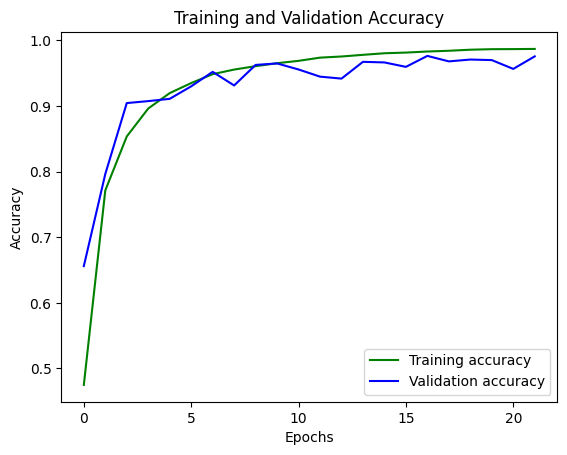

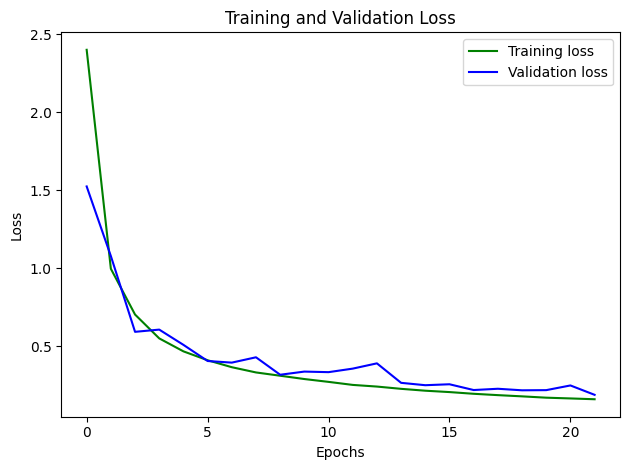

In [12]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
# Adjust the range of epochs to match the length of the history lists
epochs = range(len(acc)) #use acc since it is the shorter one

fig1, axs1 = plt.subplots()
axs1.plot(epochs, acc, 'g', label='Training accuracy')
axs1.plot(epochs, val_acc, 'b', label='Validation accuracy')
axs1.set_title('Training and Validation Accuracy')
axs1.set_xlabel('Epochs')
axs1.set_ylabel('Accuracy')
axs1.legend()

fig2, axs2 = plt.subplots()
axs2.plot(epochs, loss, 'g', label='Training loss')
axs2.plot(epochs, val_loss, 'b', label='Validation loss')
axs2.set_title('Training and Validation Loss')
axs2.set_xlabel('Epochs')
axs2.set_ylabel('Loss')
axs2.legend()

plt.tight_layout()
plt.show()

In [13]:

print('Testing dataset Prediction')
Y_pred = model.predict(val_datagen)
y_pred = np.argmax(Y_pred, axis=1)

# Extract true labels from the dataset and convert to class indexes.
y_true = np.concatenate([np.argmax(y, axis=1) for x, y in val_datagen], axis=0)

print(confusion_matrix(y_true, y_pred)) #Replace val_datagen.classes with y_true.
print('-------------------------------------------------------------------------------------')

class_labels = val_datagen.class_names #Replace val_datagen.class_indices.keys() with val_datagen.class_names
print('Classification Report')
target_names = class_labels
print('Target names')
print(classification_report(y_true, y_pred, target_names=target_names, zero_division=1)) #Replace val_datagen.classes with y_true.
print('Labels')
print(classification_report(y_true, y_pred, labels=np.unique(y_pred), zero_division=1)) #Replace val_datagen.classes with y_true.


Testing dataset Prediction
431/431 ━━━━━━━━━━━━━━━━━━━━ 452s 1s/step
[[231   0   0 ...   0   0   0]
 [  0 154   0 ...   0   0   0]
 [  0   0 235 ...   0   0   0]
 ...
 [  0   0   0 ... 157   0   0]
 [  0   0   0 ...   0  80   0]
 [  0   0   0 ...   0   0  80]]
-------------------------------------------------------------------------------------
Classification Report
Target names
                           precision    recall  f1-score   support

                 Apple 10       1.00      1.00      1.00       231
                 Apple 12       0.99      1.00      0.99       154
                 Apple 13       1.00      1.00      1.00       235
                 Apple 14       1.00      1.00      1.00       154
                 Apple 17       1.00      1.00      1.00       201
                  Apple 6       1.00      1.00      1.00       157
                  Apple 9       0.81      1.00      0.90       231
         Apple Braeburn 1       0.83      0.99      0.91       164
             A

In [14]:
"""
data_augmentation = tf.keras.models.Sequential([
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.RandomFlip("horizontal_and_vertical"),
     tf.keras.layers.RandomRotation(0.2),
     tf.keras.layers.RandomZoom(0.2),
     tf.keras.layers.RandomTranslation(height_factor=0.4, width_factor=0.4)
     ])

#vgg-16 model
model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(img_rows, img_cols, 3)),
        data_augmentation,
        # 1st Block
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', kernel_initializer='he_normal',
                            input_shape=(img_rows, img_cols, 3), activation='elu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', kernel_initializer='he_normal',
                            input_shape=(img_rows, img_cols, 3), activation='elu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
        # 2nd Block
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', kernel_initializer='he_normal',
                            input_shape=(img_rows, img_cols, 3), activation='elu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', kernel_initializer='he_normal',
                            input_shape=(img_rows, img_cols, 3), activation='elu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
        # 3rd Block
        tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', kernel_initializer='he_normal',
                            input_shape=(img_rows, img_cols, 3), activation='elu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', kernel_initializer='he_normal',
                            input_shape=(img_rows, img_cols, 3), activation='elu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', kernel_initializer='he_normal',
                            input_shape=(img_rows, img_cols, 3), activation='elu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
        # 4th Block
        tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', kernel_initializer='he_normal',
                            input_shape=(img_rows, img_cols, 3), activation='elu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', kernel_initializer='he_normal',
                            input_shape=(img_rows, img_cols, 3), activation='elu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', kernel_initializer='he_normal',
                            input_shape=(img_rows, img_cols, 3), activation='elu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
        # 5th Block
        tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', kernel_initializer='he_normal',
                            input_shape=(img_rows, img_cols, 3), activation='elu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', kernel_initializer='he_normal',
                            input_shape=(img_rows, img_cols, 3), activation='elu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', kernel_initializer='he_normal',
                            input_shape=(img_rows, img_cols, 3), activation='elu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
        # Fully Connected Layer (FCL)
        # 5th Block
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='elu', kernel_initializer='he_normal',
                           kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        # 6th Block
        tf.keras.layers.Dense(64, activation='elu', kernel_initializer='he_normal',
                           kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        # 7th Block
        tf.keras.layers.Dense(numberOfClass, kernel_initializer='he_normal', activation='softmax'),
    ])
print(model.summary())
"""

'\ndata_augmentation = tf.keras.models.Sequential([\n     tf.keras.layers.Rescaling(1./255),\n     tf.keras.layers.RandomFlip("horizontal_and_vertical"),\n     tf.keras.layers.RandomRotation(0.2),\n     tf.keras.layers.RandomZoom(0.2),\n     tf.keras.layers.RandomTranslation(height_factor=0.4, width_factor=0.4)\n     ])\n\n#vgg-16 model\nmodel = tf.keras.models.Sequential([\n        tf.keras.layers.Input(shape=(img_rows, img_cols, 3)),\n        data_augmentation,\n        # 1st Block\n        tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding=\'same\', kernel_initializer=\'he_normal\',\n                            input_shape=(img_rows, img_cols, 3), activation=\'elu\'),\n        tf.keras.layers.BatchNormalization(),\n        tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding=\'same\', kernel_initializer=\'he_normal\',\n                            input_shape=(img_rows, img_cols, 3), activation=\'elu\'),\n        tf.keras.layers.BatchNormalization(),\n        tf